In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
df = pd.read_csv('../input/fake-news/train.csv')
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [8]:
##Drop NAN values
df = df.dropna()

In [14]:
##Get Independent Features

X = df.drop('label', axis = 1)

## get Dependent Features
y = df['label']

X.shape, y.shape

((18285, 4), (18285,))

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [17]:
### Vocabulary size
voc_size=5000

# Onehot Representation

In [23]:
messages=X.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [24]:
import nltk
import re
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
## Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [28]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[:10]

[[411, 2026, 109, 2247, 2532, 3072, 3360, 938, 3879, 464],
 [2406, 4280, 4110, 1813, 3138, 422, 2138],
 [3108, 1197, 4410, 2915],
 [2365, 2081, 3324, 3528, 208, 4246],
 [3575, 3138, 4305, 989, 2798, 2766, 3138, 1286, 4273, 272],
 [4291,
  2845,
  4317,
  4916,
  2289,
  3657,
  841,
  1012,
  341,
  1603,
  4847,
  1354,
  4834,
  243,
  2138],
 [381, 4482, 3139, 4541, 1834, 3674, 2558, 2520, 2526, 194, 230],
 [4766, 2649, 920, 3269, 430, 1980, 3657, 4392, 2526, 194, 230],
 [4349, 4688, 3467, 4132, 2589, 4736, 1682, 1876, 3657, 3990],
 [2320, 4721, 3294, 3711, 3773, 4970, 2046, 4658]]

# Embedding Representation

In [29]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[ 411 2026  109 ...    0    0    0]
 [2406 4280 4110 ...    0    0    0]
 [3108 1197 4410 ...    0    0    0]
 ...
 [3251 2604 1870 ...    0    0    0]
 [1288  430 3941 ...    0    0    0]
 [3062  155 2308 ...    0    0    0]]


In [30]:
## Creating model
embedding_vector_features=60
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 60)            300000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               64400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 364,501
Trainable params: 364,501
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
len(embedded_docs),y.shape

(18285, (18285,))

In [32]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [33]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [44]:
#Model Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.4932 - val_accuracy: 0.9082
Epoch 2/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.5350 - val_accuracy: 0.9057
Epoch 3/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.5445 - val_accuracy: 0.9046
Epoch 4/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.6489 - val_accuracy: 0.9031
Epoch 5/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0125 - accuracy: 0.9970 - val_loss: 0.4665 - val_accuracy: 0.9056
Epoch 6/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.4930 - val_accuracy: 0.9046
Epoch 7/10
192/192 [==============================] - 2s 9ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.5076 - val_accuracy: 0.9046
Epoch

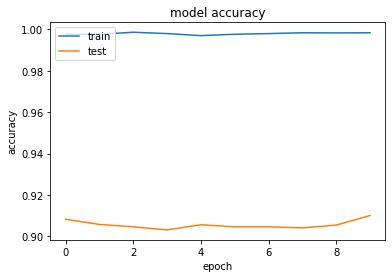

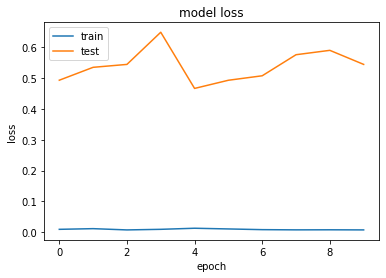

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Performance Evaluation

In [36]:
y_pred=model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test,y_pred)

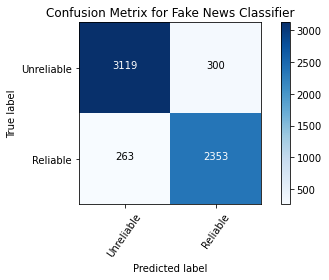

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cm_plot_label =['Unreliable', 'Reliable']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Fake News Classifier')

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9067108533554267

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.89      0.90      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035

